# Titanic survival prediciton using Machine Learning


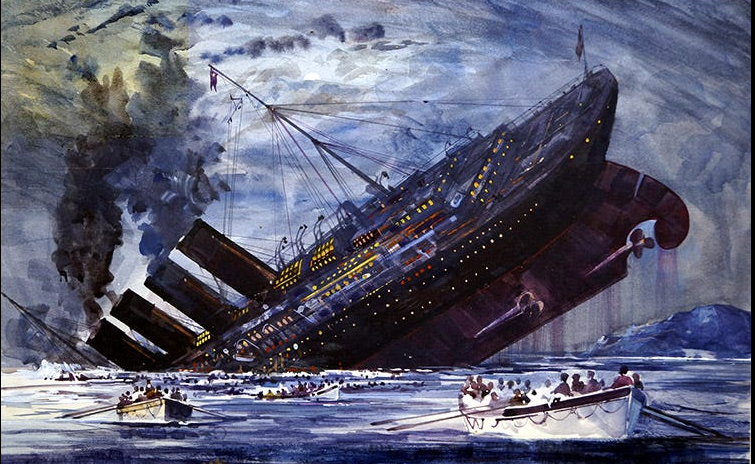

AUthor :  __LAGRE GABBA BERTRAND__

## 1. Data reading

In [42]:
# we import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,RandomForestClassifier
import xgboost as xgb
import joblib,pickle 
import warnings
warnings.filterwarnings("ignore")

In [43]:
df = pd.read_csv("titanic.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [44]:
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [45]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 2. Data Visualization

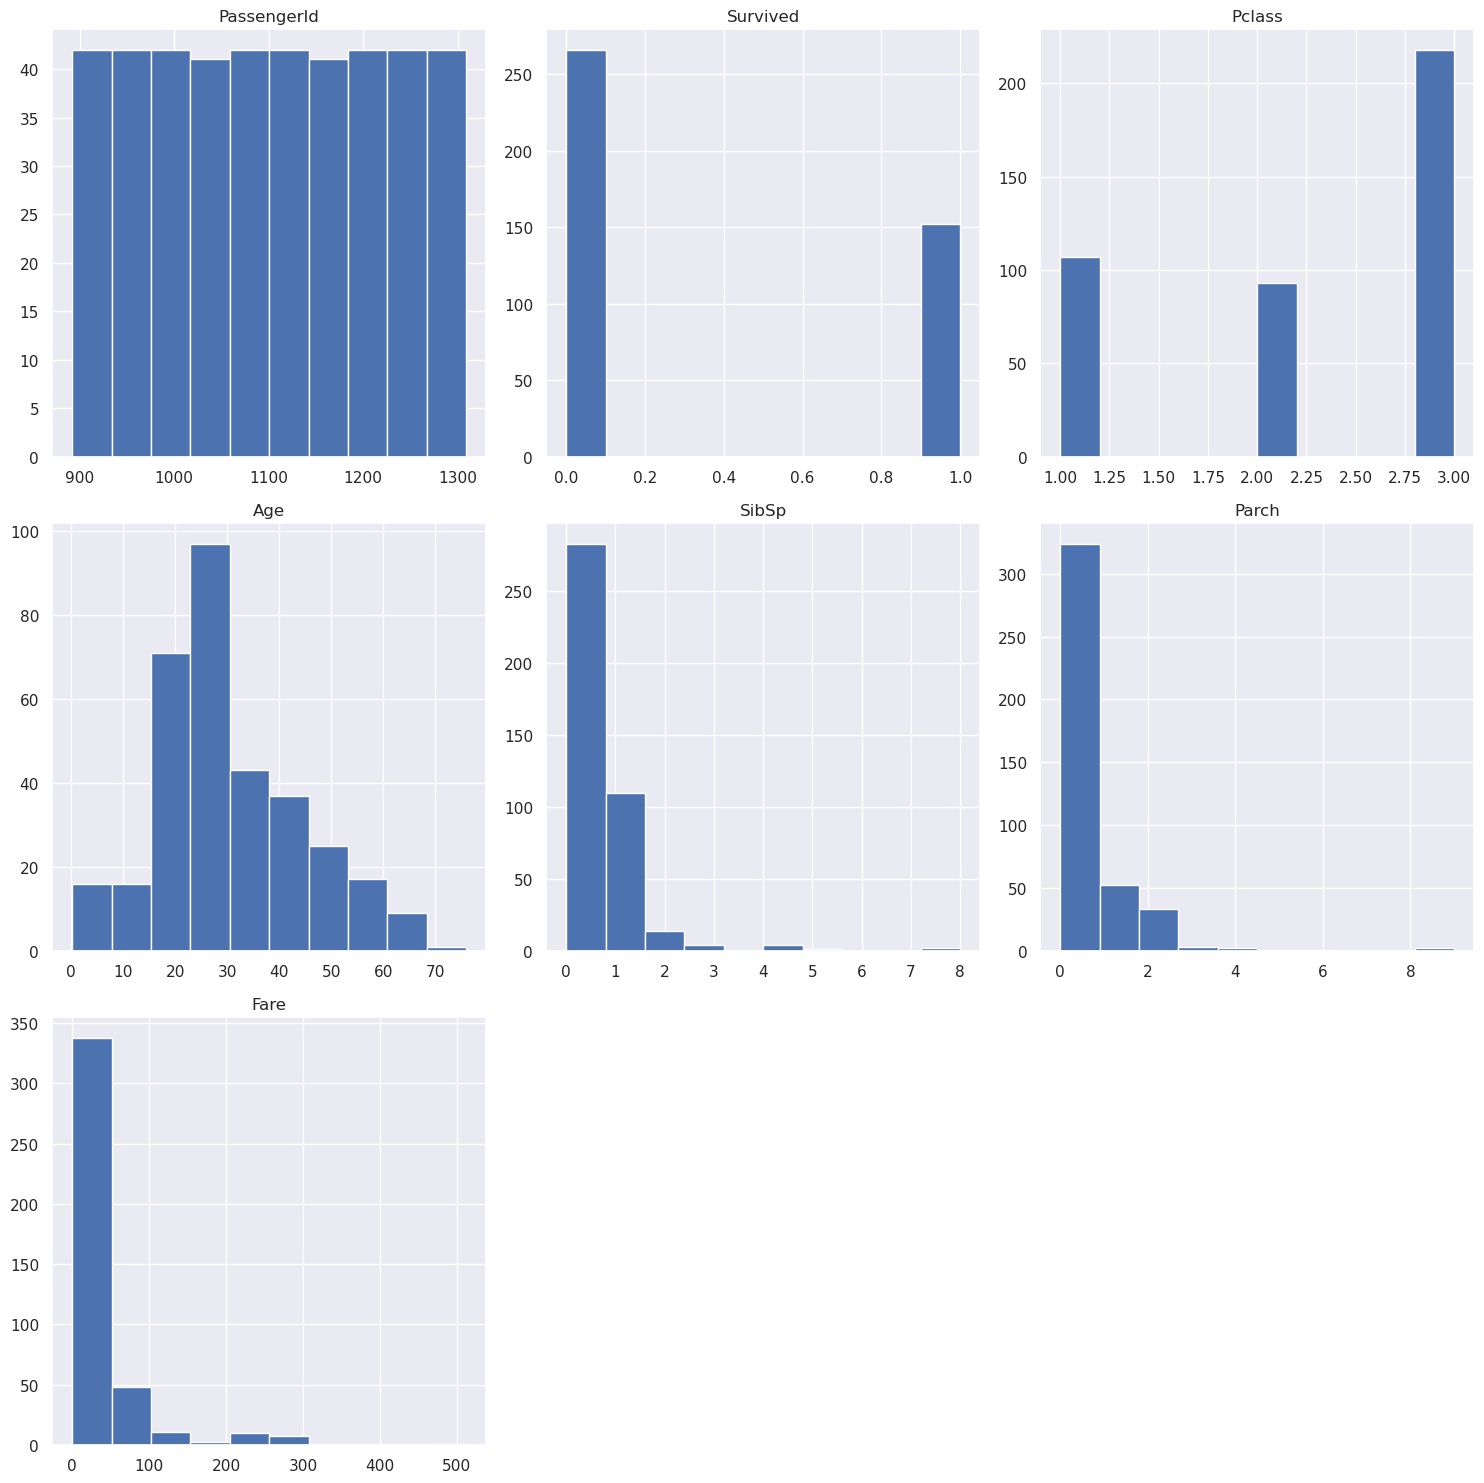

In [46]:
df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

In [47]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [48]:
df.drop(['Name','Cabin','Ticket'],inplace=True,axis=1)

In [49]:
columns = df.columns.tolist()
len(columns)

9

In [50]:
column_to_encode = ['Sex','Embarked']
for col in column_to_encode:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

In [51]:
pd.DataFrame(data=[df[columns].skew(),df[columns].kurtosis()],index=['skewness','kurtosis'])

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
skewness,0.0,0.568991,-0.534170,-0.568991,0.457361,4.168337,4.654462,3.687213,-0.873825
kurtosis,-1.2,-1.684332,-1.382666,-1.684332,0.083783,26.498712,31.412513,17.921595,-1.060712


there are outlier that we want to remove.

In [52]:
pd.DataFrame(data=[df[columns[0:30]].skew(),df[columns[0:30]].kurtosis()],index=['skewness','kurtosis'])

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
skewness,0.0,0.568991,-0.534170,-0.568991,0.457361,4.168337,4.654462,3.687213,-0.873825
kurtosis,-1.2,-1.684332,-1.382666,-1.684332,0.083783,26.498712,31.412513,17.921595,-1.060712


<Axes: >

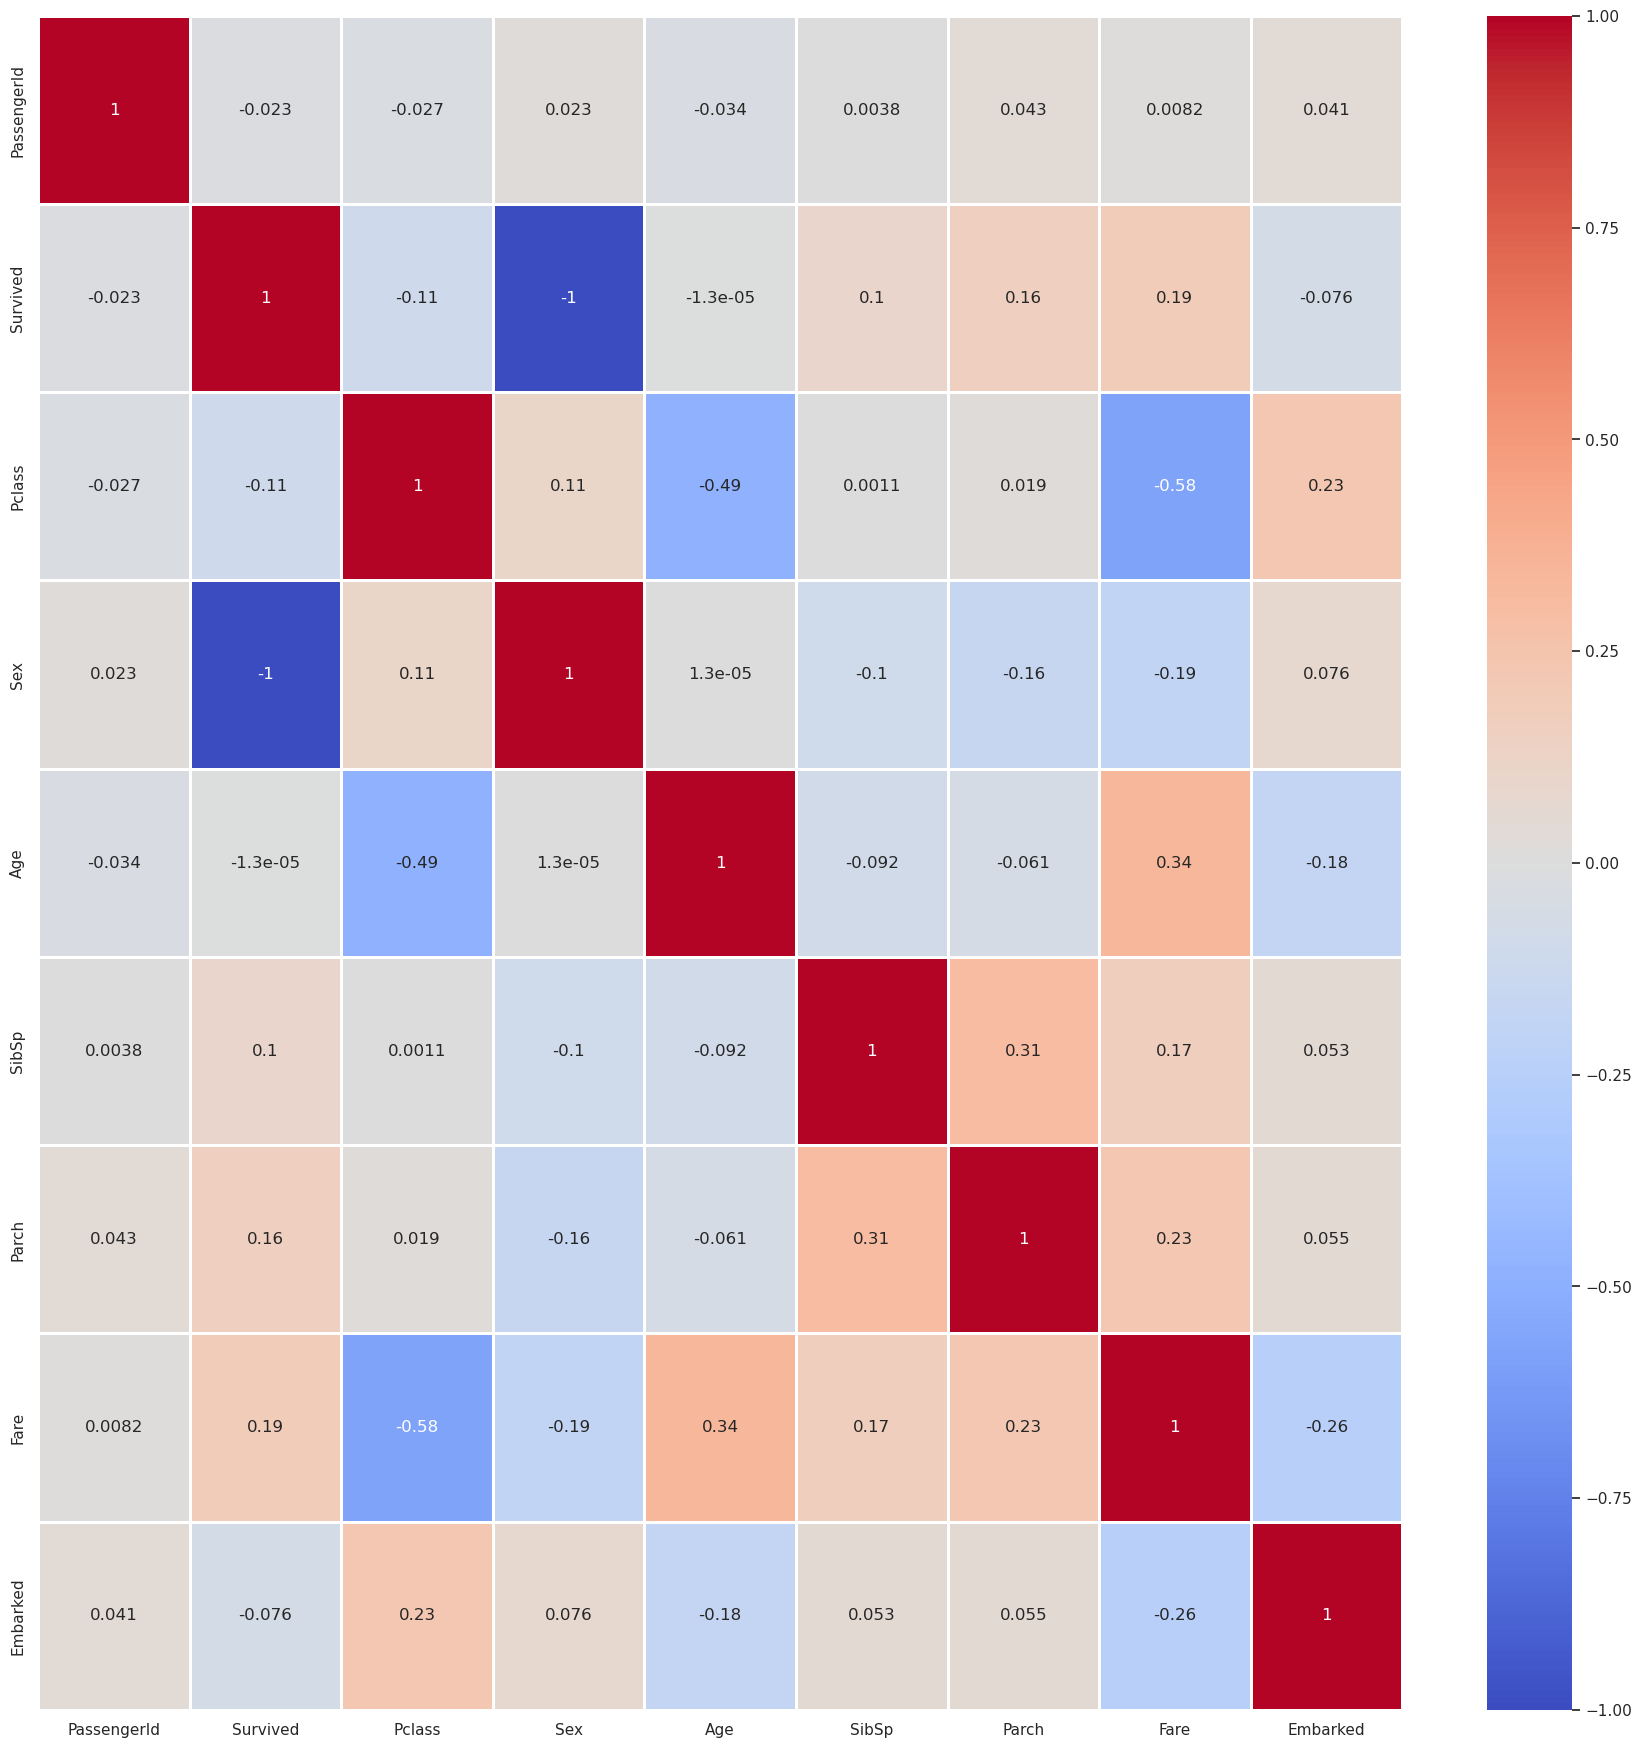

In [53]:
f = plt.figure(figsize=(22,22))
sns.set()
sns.heatmap(df.corr(), linewidths='2',annot=True,cmap='coolwarm')

In [56]:
#  create a column that interpret each value of target
def credit_class(Class):
    if (Class ==1):
        return "Yes"
    else:
        return "No"

df['Interpretation'] = df['Survived'].apply(credit_class)
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Interpretation
0,892,0,3,1,34.5,0,0,7.8292,1,No
1,893,1,3,0,47.0,1,0,7.0000,2,Yes
2,894,0,2,1,62.0,0,0,9.6875,1,No
3,895,0,3,1,27.0,0,0,8.6625,2,No
4,896,1,3,0,22.0,1,1,12.2875,2,Yes
5,897,0,3,1,14.0,0,0,9.2250,2,No
6,898,1,3,0,30.0,0,0,7.6292,1,Yes
7,899,0,2,1,26.0,1,1,29.0000,2,No
8,900,1,3,0,18.0,0,0,7.2292,0,Yes
9,901,0,3,1,21.0,2,0,24.1500,2,No


In [14]:
df['Interpretation'].value_counts()

No     266
Yes    152
Name: Interpretation, dtype: int64

In [15]:
# let's define a function that can plot the relation between features
def show_relation(name):
    sns.kdeplot(df.loc[df['Interpretation']=='Yes',name], label='Yes')
    sns.kdeplot(df.loc[df['Interpretation']=='No',name], label='No')
    plt.legend()
    plt.show()

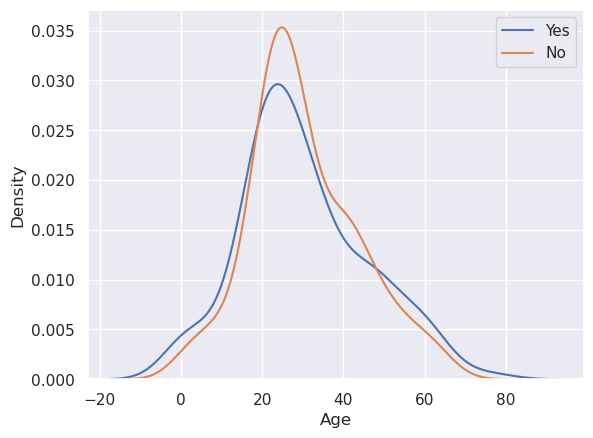

In [16]:
show_relation("Age")

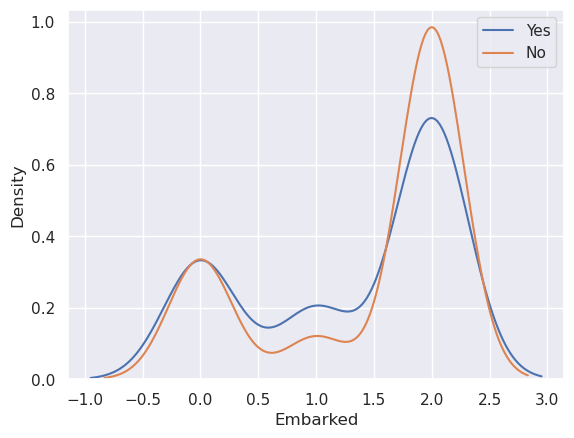

In [17]:
show_relation("Embarked")

In [18]:
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Sex                0
Age               86
SibSp              0
Parch              0
Fare               1
Embarked           0
Interpretation     0
dtype: int64

In [19]:
df.fillna(df.mean(),inplace=True)

In [20]:
df.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Fare              0
Embarked          0
Interpretation    0
dtype: int64

In [21]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [22]:
df.shape

(418, 10)

## 3. Model training

In [23]:
X = df.drop(['Survived','Interpretation'],axis=1)
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.50000,0,0,7.8292,1
1,893,3,0,47.00000,1,0,7.0000,2
2,894,2,1,62.00000,0,0,9.6875,1
3,895,3,1,27.00000,0,0,8.6625,2
4,896,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,1305,3,1,30.27259,0,0,8.0500,2
414,1306,1,0,39.00000,0,0,108.9000,0
415,1307,3,1,38.50000,0,0,7.2500,2
416,1308,3,1,30.27259,0,0,8.0500,2


Our target y will be the column Class.

In [24]:
Y = df['Survived']

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, train_size=0.7,random_state=42)

In [26]:
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Now it's time the test algorimths and we can choose the best

## 3.1. Gaussian

In [27]:
gauss = GaussianNB()
gauss.fit(X_train, Y_train)
Y_pred = gauss.predict(X_test)


In [28]:
gauss_accuracy = round(accuracy_score(Y_test,Y_pred)*100,2)
print(f"the accuracy is {gauss_accuracy} %")


the accuracy is 100.0 %


In [29]:

predictions = gauss.predict(X_test)
print(f"The error is {round(mean_squared_error(predictions, Y_test)*100,2)} %")

The error is 0.0 %


## 3.2. kneighbor

In [30]:
kneighbor = KNeighborsClassifier(n_neighbors = 4)
kneighbor.fit(X_train, Y_train)
Y_pred = kneighbor.predict(X_test)


In [31]:
kneighbor_accuracy = round(accuracy_score(Y_test,Y_pred)*100,2)
print(f"the accuracy is {kneighbor_accuracy} %")


the accuracy is 98.41 %


In [32]:

predictions = kneighbor.predict(X_test)
print(f"The error is {round(mean_squared_error(predictions, Y_test)*100,2)} %")

The error is 1.59 %


##  3.7 Random Forest Classifier algorithm


In [33]:

random_fr = RandomForestClassifier(n_estimators=100,random_state=42)
random_fr.fit(X_train, Y_train)
Y_pred = random_fr.predict(X_test)


In [34]:
random_accuracy = round(accuracy_score(Y_test,Y_pred)*100,2)
print(f"the accuracy is {random_accuracy} %")

the accuracy is 100.0 %


In [35]:

predictions = random_fr.predict(X_test)
print(f"The error is {round(mean_squared_error(predictions, Y_test)*100,2)} %")

The error is 0.0 %


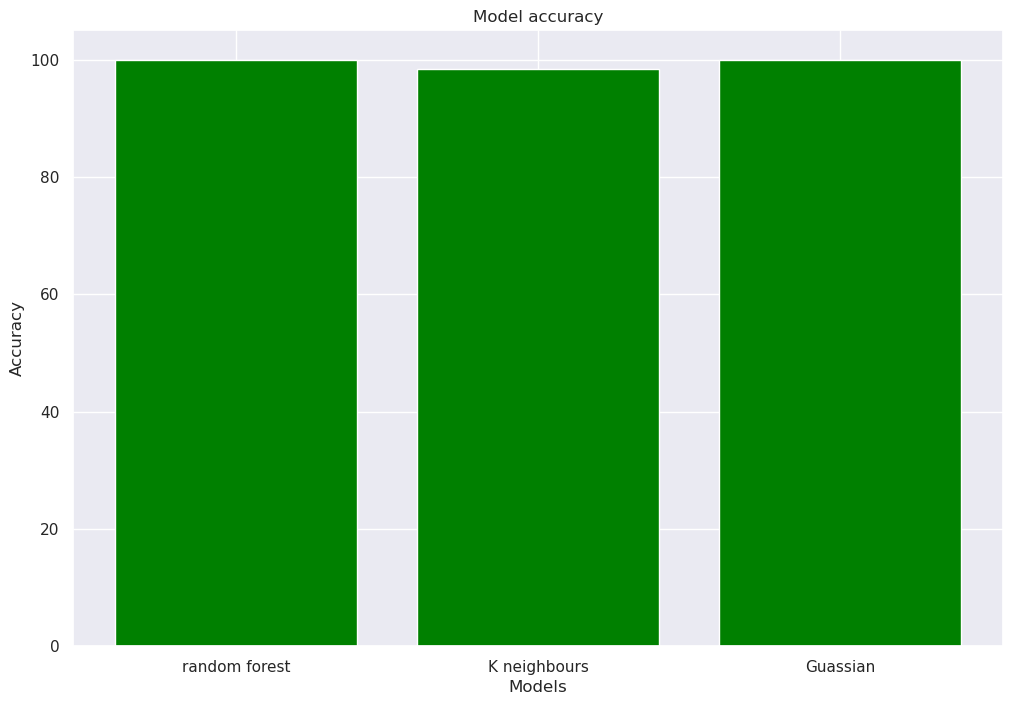

In [36]:
import matplotlib.pyplot as plt

models = ['random forest',  'K neighbours','Guassian']
scores = [random_accuracy ,kneighbor_accuracy,gauss_accuracy]


plt.figure(figsize=(12, 8))
plt.bar(models, scores, color='green')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model accuracy')

plt.show()

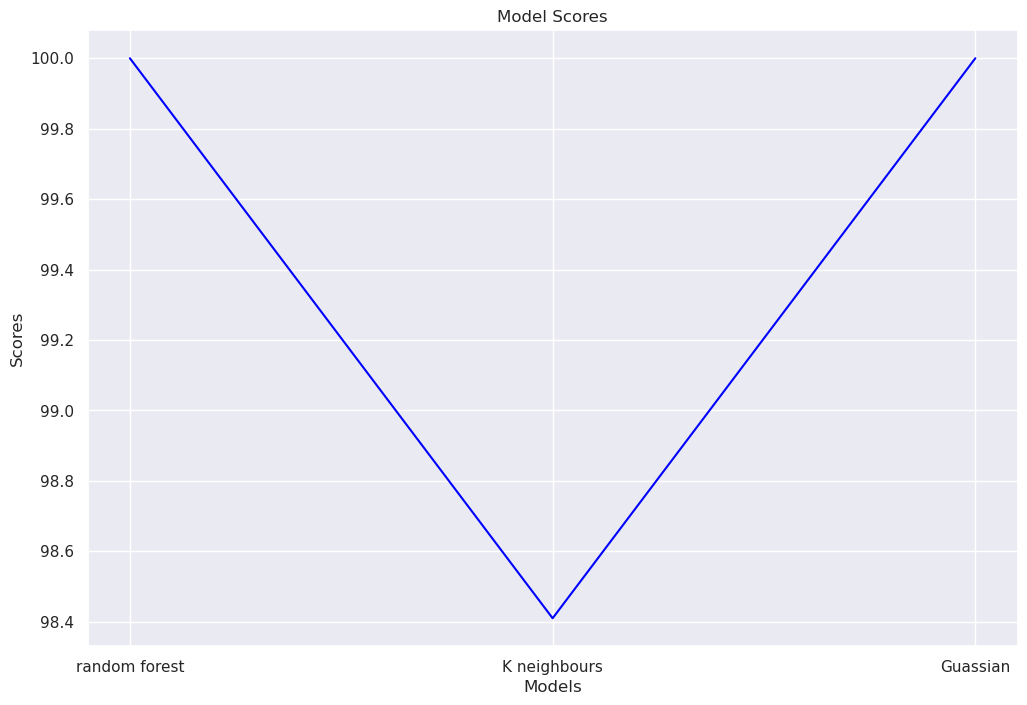

In [37]:
import matplotlib.pyplot as plt

models = ['random forest','K neighbours','Guassian']
scores = [random_accuracy ,kneighbor_accuracy,gauss_accuracy]


plt.figure(figsize=(12, 8))
plt.plot(models, scores, color='blue')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Scores')

plt.show()

We can save the model

In [38]:
joblib.dump(random_fr, "titanic.sav")

['titanic.sav']

In [39]:
# export the cleaned csv
df.to_csv("titanic_cleaned.csv")